In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
dataparse= lambda x: pd.datetime.strptime(x, '%d-%m-%Y')
rel=pd.read_csv('RELIANCE.csv', parse_dates=['Date'],date_parser=dataparse)
rel.head()

C:\Users\Nachiketh\AppData\Local\Temp\ipykernel_18596\1421703703.py:1: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



,Date,Symbol,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,RELIANCE,1084.00,1090.0,1072.35,1085.10,1086.63,1622458
1,2017-01-03,RELIANCE,1089.85,1097.0,1081.10,1089.40,1091.74,1470751
2,2017-01-04,RELIANCE,1092.90,1093.0,1064.30,1067.15,1072.39,2375547
3,2017-01-05,RELIANCE,1071.00,1079.9,1068.75,1077.40,1077.12,1996483
4,2017-01-06,RELIANCE,1074.20,1085.0,1073.10,1074.95,1078.77,1793427


In [3]:
rel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1487 entries, 0 to 1486
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1487 non-null   datetime64[ns]
 1   Symbol     1487 non-null   object        
 2   Open       1487 non-null   float64       
 3   High       1487 non-null   float64       
 4   Low        1487 non-null   float64       
 5   Close      1487 non-null   float64       
 6   Adj Close  1487 non-null   float64       
 7   Volume     1487 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 93.1+ KB


In [4]:
print(f'Dataframe contains stock price between {rel.Date.min()} {rel.Date.max()}')
print(f'Total days={(rel.Date.max()  - rel.Date.min()).days}days')

Dataframe contains stock price between 2017-01-02 00:00:00 2022-12-30 00:00:00
Total days=2188days


In [5]:
rel.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1.487000e+03
mean,1674.622966,1693.746402,1654.706725,1673.454001,1674.533578,9.135150e+06
std,586.319750,592.271598,580.027848,585.865400,586.167890,7.113892e+06
min,791.750000,793.400000,779.100000,780.900000,785.510000,7.871600e+05
25%,1192.750000,1214.500000,1176.475000,1192.475000,1194.090000,4.987274e+06
50%,1480.000000,1506.450000,1464.050000,1487.600000,1485.820000,7.121509e+06
75%,2205.175000,2229.350000,2178.725000,2202.350000,2204.940000,1.067265e+07
max,2856.150000,2856.150000,2786.100000,2819.850000,2823.910000,6.523089e+07


<AxesSubplot:>

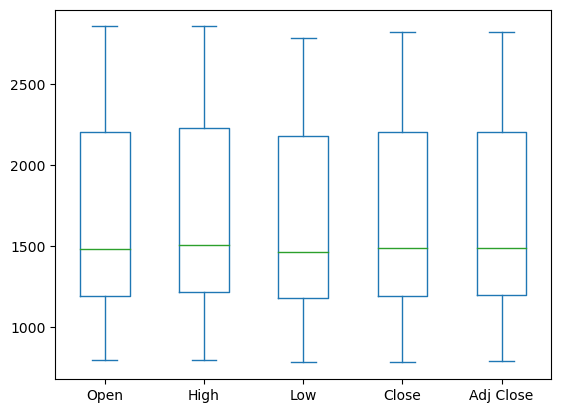

In [6]:
rel[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [7]:
layout=go.Layout(
    title='Stock Price Of Reliance',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family="Courier New, monospace",
            size=12,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family="Courier New, monospace",
            size=12,
            color='#7f7f7f'
        )
    )
)

rel_data=[{'x':rel['Date'],'y':rel['Close']}]
plot=go.Figure(data=rel_data, layout=layout)

In [8]:
iplot(plot)

In [9]:
#Building the regression model
from sklearn.model_selection import train_test_split
#for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#for model evolution
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [10]:
#split the data into train and test sets
X=np.array(rel.index).reshape(-1,1)
Y=rel['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [11]:
#feature scaling
scaler=StandardScaler().fit(X_train)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
#Creating a linear model
lm=LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [14]:
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = "markers",
    name = "Actual"
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
rel_data = [trace0,trace1]
layout.xaxis.title.text = "Day"
plot2 = go.Figure(data=rel_data, layout=layout)

In [15]:
iplot(plot2)

In [16]:
#calculate scores for model evaluation
scores=f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}

'''
print(scores)


Metric           Train                Test        
r2_score  0.8157184453942924	0.7697708806738105
MSE       63953.4557685264	76461.76725321483


